#I. Algorithm

First, we will define the functions that compute the Ordinary Least Squares estimates of our coefficients based on our training data.

In [114]:
# Importing Necessary Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [76]:
# Given training data set x and y values, returns the b0 and b1 Estimates
# Simple Linear Regression
def ols_estimate(x,y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    ssy = sum((x-xbar)*(y-ybar))
    ssx = sum((x-xbar)*(x-xbar))
    b1 = ssy/ssx
    b0 = ybar - b1*xbar
    return [b0,b1]

In [72]:
def calculate_residuals(x, y):
    """
    Computes the residuals for a simple linear regression model.
    :param x: A vector of shape (n_samples,).
    :param y: A vector of shape (n_samples,).
    :return: A vector of residuals (y - y_hat).
    """
    beta = ols_estimate(x, y)
    y_hat = beta[0] + beta[1] * x # Predicted values
    residuals = y - y_hat  # Compute residuals
    
    return residuals

#II. Application to Data Set

We will apply linear regression to a dataset on 990 roller coasters around the world. Looking at the first 10 rows, we can see how data is provided on roller coaster's length, speed, location, opening date, type, inversions, and more. 

In this case, we will attempt to determine a relationship between the length of a roller coaster and its top speed.

In [6]:
coaster_data = pd.read_csv("coaster_db.csv")

In [45]:
coaster_data.tail(10)


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1077,Fønix (roller coaster),"2,969.2 ft (905.0 m)",59 mph (95 km/h),Fårup Sommerland,Under construction,NaN,Steel,Vekoma,120 cm (3 ft 11 in),Wildcat,...,59 mph,95 km/h,59.0,mph,59.0,131.2,ft,NaN,3,4.1
1078,Guardians of the Galaxy: Cosmic Rewind,"5,577.4 ft (1,700.0 m)",NaN,Epcot,Under construction,2022,Steel – Enclosed – Spinning,Vekoma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1079,Ice Breaker (roller coaster),"1,900 ft (580 m)",52 mph (84 km/h),SeaWorld Orlando,Under construction,February 2022,Steel – Launched,Premier Rides,NaN,Sky Rocket,...,52 mph,84 km/h,52.0,mph,52.0,93.0,ft,NaN,0,NaN
1080,Iron Gwazi,"4,075 ft (1,242 m)",76 mph (122 km/h),Busch Gardens Tampa Bay,Under construction,NaN,Steel – Wooden,Rocky Mountain Construction,48[1] in (122 cm),I-Box Track,...,76 mph,122 km/h,76.0,mph,76.0,206.0,ft,NaN,2,NaN
1081,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",80.0 km/h (49.7 mph),Sea World,Under construction,Easter 2022,Wood,Martin & Vleminckx,NaN,NaN,...,80.0 km/h,49.7 mph,80.0,km/h,49.7,32.0,m,105.0,0,NaN
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,...,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


In [53]:
print(f"There are {coaster_data.shape[0]} rows and {coaster_data.shape[1]} columns in our data.")



There are 1087 rows and 56 columns in our data.


We have 1087 roller coasters to work with. However, many of these coasters have missing data. In addition, the 'Length' and 'Speed' columns do not have data formatted in a numeric format. We will first perform some data cleaning.

In [115]:
# Cleaning Data Set To Only Look At Length and Speed

cleaned_data = coaster_data[['Length','Speed','Type']]

# Dropping NaN data 
cleaned_data.dropna(inplace = True)

# Convert length to just feet and speed to just miles per hour

cleaned_data['Length'] = cleaned_data['Length'].str.replace(',', '').str.extract(r'(\d+)')[0].astype(float)
cleaned_data['Speed'] = cleaned_data['Speed'].str.replace(',', '').str.extract(r'(\d+)')[0].astype(float)
cleaned_data['Type'] = cleaned_data['Type'].apply(lambda x: re.sub(r'[\xa0\u2013\u2014]', ' ', str(x))).str.split(' ').str[0]


/var/folders/xh/x976_5p93059y1sn4ybh8ql40000gn/T/ipykernel_99928/2049961250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.dropna(inplace = True)
/var/folders/xh/x976_5p93059y1sn4ybh8ql40000gn/T/ipykernel_99928/2049961250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Length'] = cleaned_data['Length'].str.replace(',', '').str.extract(r'(\d+)')[0].astype(float)
/var/folders/xh/x976_5p93059y1sn4ybh8ql40000gn/T/ipykernel_99928/2049961250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [112]:
print(f"After data cleaning, there are {cleaned_data.shape[0]} rows and {cleaned_data.shape[1]} columns in our data.")



After data cleaning, there are 900 rows and 3 columns in our data.


In [113]:
cleaned_data['Type']

0        Wood
6        Wood
13       Wood
15       Wood
16       Wood
        ...  
1082    Steel
1083    Steel
1084    Steel
1085    Steel
1086    Steel
Name: Type, Length: 900, dtype: object

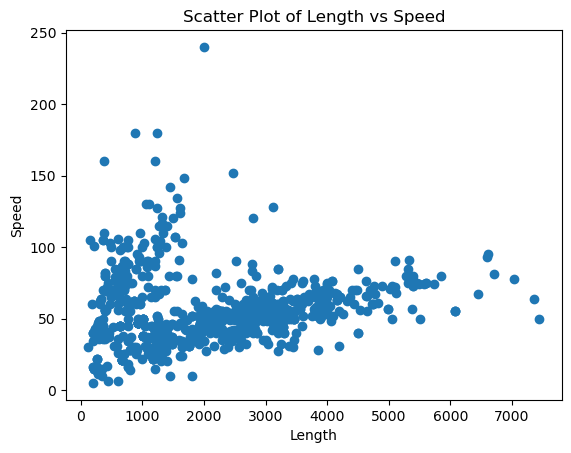

In [58]:
plt.scatter(cleaned_data['Length'], cleaned_data['Speed'])
plt.xlabel('Length')
plt.ylabel('Speed')
plt.title('Scatter Plot of Length vs Speed')
plt.show()

In [77]:
length_data = cleaned_data['Length'].to_numpy()
speed_data = cleaned_data['Speed'].to_numpy()

estimates = ols_estimate(length_data, speed_data)
residuals = calculate_residuals(length_data, speed_data)

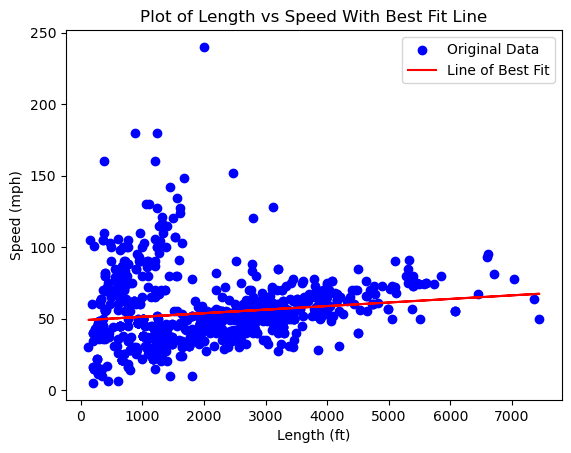

In [120]:
fitted_values = estimates[0] + estimates[1] * length_data

plt.scatter(cleaned_data['Length'], cleaned_data['Speed'], color = 'blue', label = 'Original Data')

plt.plot(length_data, fitted_values, color = 'red',label='Line of Best Fit')

plt.xlabel('Length (ft)')
plt.ylabel('Speed (mph)')
plt.title('Plot of Length vs Speed With Best Fit Line')
plt.legend()
plt.show()


As you can see, this line of best fit doesn't do a great job at capturing the variation in the data. The line of best fit is almost a horizontal line, predicting around 50 miles per hour for every single roller coaster. The residual plot confirms this, as it looks just like the original scatter plot with a shift of 50 mph downwards.  This suggests that perhaps the length of the roller coasters is too spread apart. We can try applying a logarithm transformation and recreating a model.

Text(0.5, 1.0, 'Residual Plot')

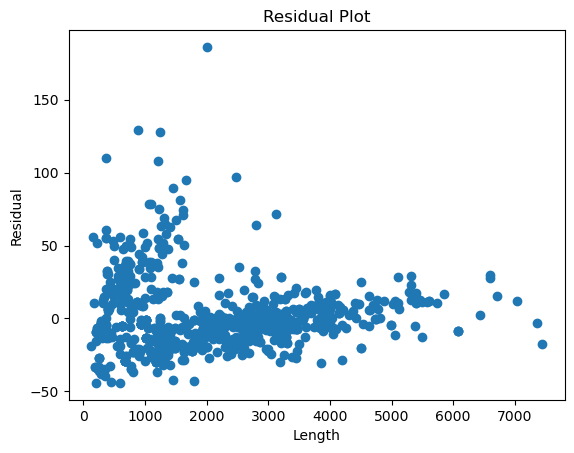

In [121]:
plt.scatter(length_data, residuals)
plt.xlabel("Length")
plt.ylabel('Residual')
plt.title('Residual Plot')

In [124]:
transform_length = np.log(length_data)

estimates = ols_estimate(transform_length, speed_data)
residuals = calculate_residuals(transform_length, speed_data)


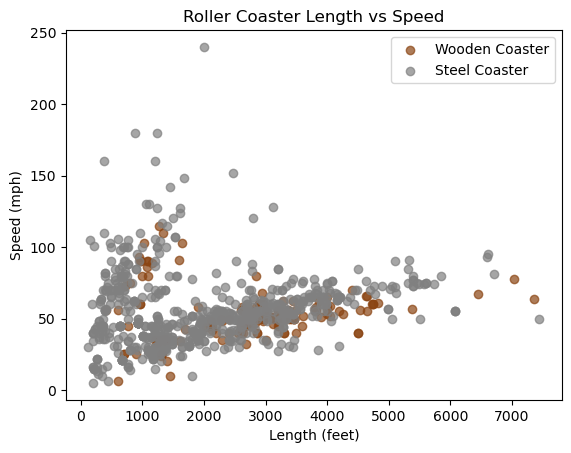

In [122]:
# Separate data for wood and steel roller coasters
wood_coasters = cleaned_data[cleaned_data['Type'] == 'Wood']
steel_coasters = cleaned_data[cleaned_data['Type'] == 'Steel']


# Plot wood roller coasters
plt.scatter(wood_coasters['Length'], wood_coasters['Speed'], 
            color='saddlebrown', label='Wooden Coaster', alpha=0.7)

# Plot steel roller coasters
plt.scatter(steel_coasters['Length'], steel_coasters['Speed'], 
            color='gray', label='Steel Coaster', alpha=0.7)

# Labels and title
plt.xlabel('Length (feet)')
plt.ylabel('Speed (mph)')
plt.title('Roller Coaster Length vs Speed')

# Add legend
plt.legend()

# Show plot
plt.show()
